In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


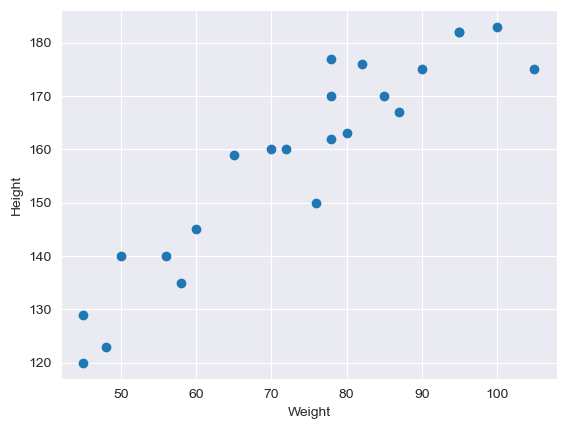

In [8]:
## scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [9]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


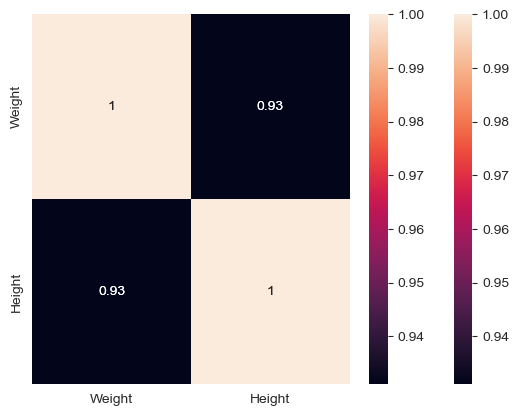

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.show()

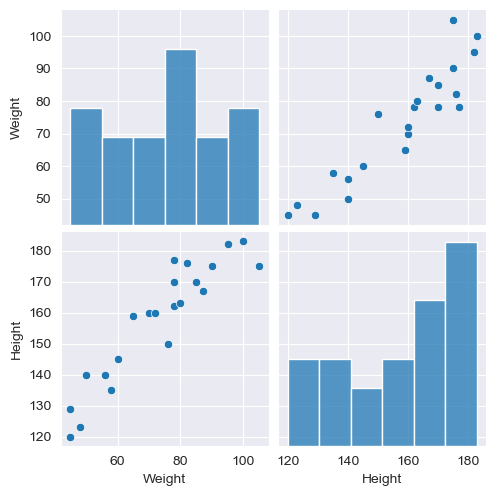

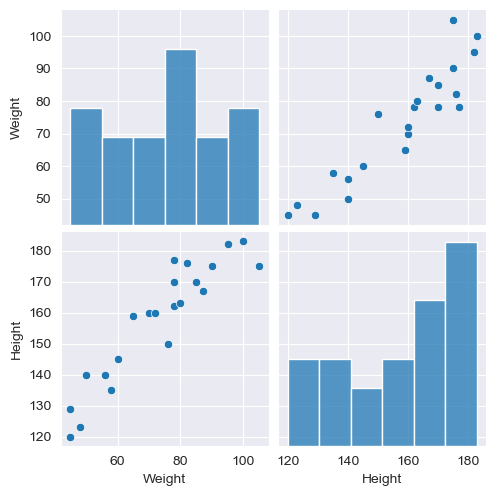

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
X= df[["Weight"]]
y = df["Height"]

In [16]:
X.shape
y.shape

(23,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin_reg = LinearRegression()

In [24]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
predict = lin_reg.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error,root_mean_squared_error

print(mean_absolute_error(y_test,predict))
print(root_mean_squared_error(y_test,predict))
print(mean_squared_error(y_test,predict))

9.665125886795005
10.716374991212605
114.84069295228699


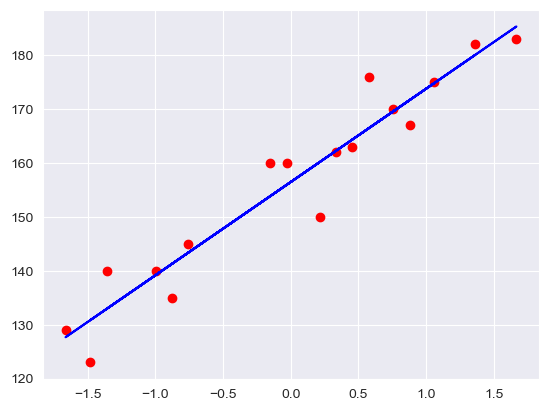

In [30]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train,lin_reg.predict(X_train),color='blue')
plt.show()

In [31]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predict))

0.7360826717981276


## OLS linera regression

In [39]:
import statsmodels.api as sm

In [40]:
model = sm.OLS(y_train, X_train).fit()

In [42]:
prid = model.predict(X_train)
print(prid)

[-15.16409156  28.84875956   5.79440897 -25.64334183  23.60913442
 -28.78711691 -13.06824151  -2.58899124   3.69855892 -23.54749178
 -17.25994162  -0.49314119  18.36950929   9.98610908  13.12988416
  15.22573421   7.89025902]


In [43]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 15 Jun 2025   Prob (F-statistic):                       0.664
Time:                        21:15:08   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/sushant/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [37]:
### pridiction for new data

ans = lin_reg.predict(scaler.transform([[72]]))


/Users/sushant/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
print(ans)

[155.97744705]
